In [ ]:
В этом ноутбуке можно посмотреть, как были получены графики из презентации в видео

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # отсюда будем брать тест Дикки-Фуллера
import matplotlib.pyplot as plt
import math as m
from scipy import stats

%matplotlib inline


Конфетный датасет содержит ежемесячные данные по производству конфет в США с 1979 по 2017 год

In [8]:
# прочитаем данные из датасета и подготовим их для дальнейшего анализа
df = pd.read_csv('candy_production.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'], format = '%Y-%m-%d')
df = df.set_index(pd.DatetimeIndex(df['observation_date']))
df.drop(['observation_date'], axis =1, inplace = True)
df.head(5)

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


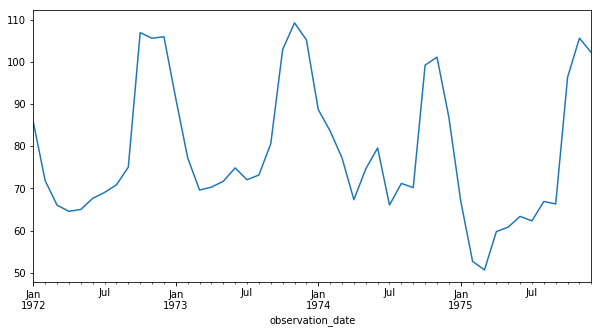

In [10]:
# создадим массив данных по производству конфет, назовем его can и построим график за первые 48 месяцев
can=df.IPG3113N
can[0:48].plot(figsize=(10,5))

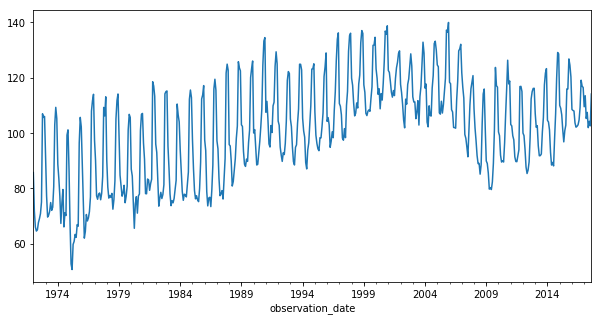

In [11]:
# построим график по всем наблюдениям
can.plot(figsize=(10,5))

По графикам хорошо видно наличие сезонности и тренда.
Протестируем ряд на стационарность по критерию Дикки-Фуллера. В качестве порогового значения p-value возьмем 0.05
adfuller возвращает довольно много разных параметров, p-value находится в массиве test под номером 1

In [12]:
test = sm.tsa.adfuller(can)
p_value = test[1]
print ('p-value: ', p_value)
if p_value> 0.05: 
    print (' ряд не стационарен')
else:
    print ('ряд стационарен')

p-value:  0.3381775973
 ряд не стационарен


Следующий датасет - производство солнечной энергии. В нем наc интересует столбец cum_power

In [19]:
df2 = pd.read_csv('solarpower_cumuldaybyday2.csv')
df2['date'] = pd.to_datetime(df2['date'], format = '%d/%m/%Y')
df2 = df2.set_index(pd.DatetimeIndex(df2['date']))
df2.drop(['date'], axis =1, inplace = True)
df2.drop(['Unnamed: 2'], axis =1, inplace = True)
df2.head(5)

,cum_power
date,
2011-10-26,0.1
2011-10-27,10.2
2011-10-28,20.2
2011-10-29,29.6
2011-10-30,34.2


Нарисуем график. По нему хорошо видно, что это именно накопленная энергия: cumupative power, так как она монотонно растет

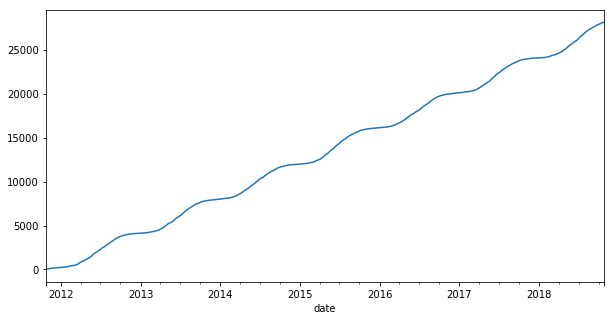

In [20]:
sp=df2.cum_power
sp.plot(figsize=(10,5))

Давайте посмотрим на ежедневное производство электроэнергии. Для этого найдем приращения нашего ряда: из каждого значения ряда вычтем предыдущее.

В питоне для этого есть специальная команда sp.diff(periods=1).dropna(). Здесь написано, что нужно взять разность с периодом 1 (из каждого вычесть предыдущее) и выкинуть пустые значения

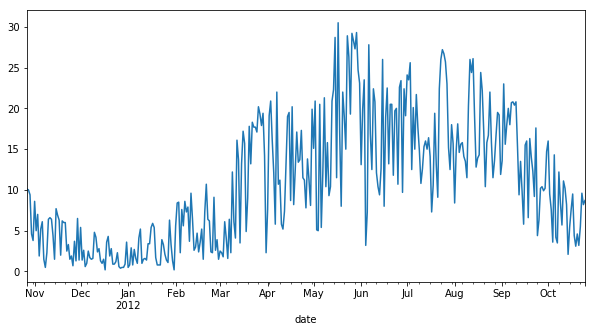

In [21]:
dayp = sp.diff(periods=1).dropna()
# нарисуем график за первый год наблюдений
dayp[0:365].plot(figsize=(10,5))

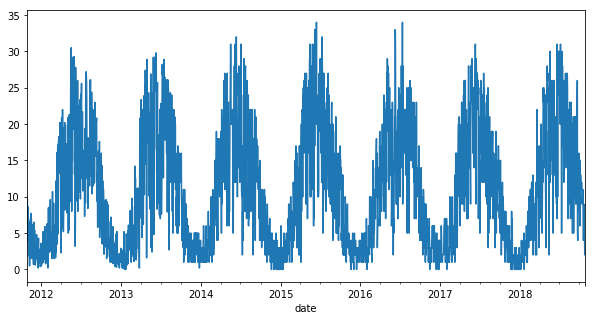

In [22]:
# нарисуем график за все время наблюдения. Этот ряд также не стационарен.
dayp.plot(figsize=(10,5))

Рисуем картинки для акций Uniqlo

In [46]:
df3 = pd.read_csv('uniqlo.csv')
df3['Date'] = pd.to_datetime(df3['Date'], format = '%Y-%m-%d')
df3 = df3.set_index(pd.DatetimeIndex(df3['Date']))
# столбец Date нам больше не нужен, удалим его
df3.drop(['Date'], axis =1, inplace = True)
df3.shape

(1226, 6)

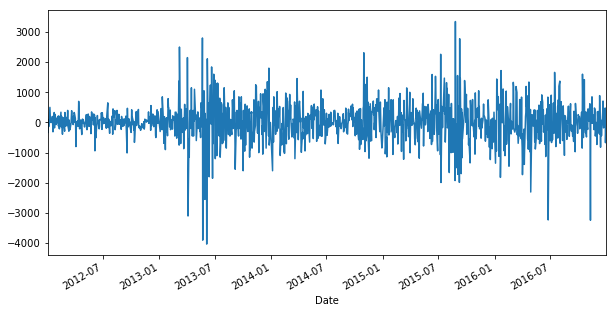

In [47]:
# Составим временной ряд разностей цены закрытия биржи и цены открытия биржи
diff =  df3.Close - df3.Open
diff.plot(figsize=(10,5))

In [48]:
# Наш ряд выглядит неплохо - не заметно ни трендов, ни сезонности. Проверим стационарность тестом Дикки-Фуллера
test = sm.tsa.adfuller(diff)
p_value = test[1]
print ('p-value: ', p_value)
if p_value> 0.05: 
    print (' ряд не стационарен')
else:
    print ('ряд стационарен')

p-value:  0.0
ряд стационарен


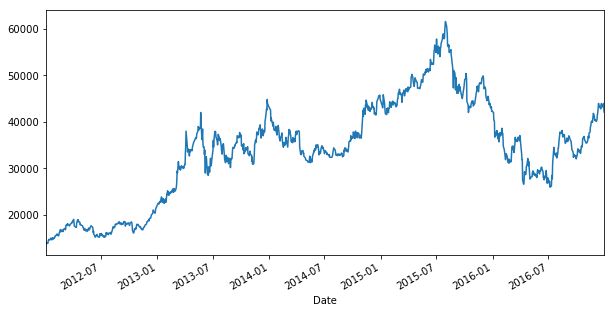

In [49]:
# Построим график для цены открытия.
openpr=df3.Open
openpr.plot(figsize=(10,5))

In [50]:
# График напоминает случайное блуждание. Невооруженным взглядом видно, что он ряд не стационарен, но все же проведем проверку
test = sm.tsa.adfuller(openpr)
p_value = test[1]
print ('p-value: ', p_value)
if p_value> 0.05: 
    print (' ряд не стационарен')
else:
    print ('ряд стационарен')

p-value:  0.814187192956
 ряд не стационарен


Последний пример в этом блоке - котировки доллара на бирже криптовалют.
Среди столбцов нам интересны baseAsset - btc, quoteAsset - true USD
bidPrice - цена предложения для 1 true dollar

In [51]:
df4 = pd.read_csv('BTCTUSD.csv')
df4.columns

Index(['active', 'activeBuy', 'activeSell', 'baseAsset', 'baseAssetName',
       'baseAssetUnit', 'close', 'decimalPlaces', 'high', 'lastAggTradeId',
       'low', 'market', 'marketName', 'matchingUnitType', 'minQty', 'minTrade',
       'open', 'parentMarket', 'parentMarketName', 'prevClose', 'productType',
       'quoteAsset', 'quoteAssetName', 'quoteAssetUnit', 'status', 'symbol',
       'tickSize', 'tradedMoney', 'volume', 'withdrawFee', 'bidPrice',
       'bidQty', 'askPrice', 'askQty', 'timestamp'],
      dtype='object')

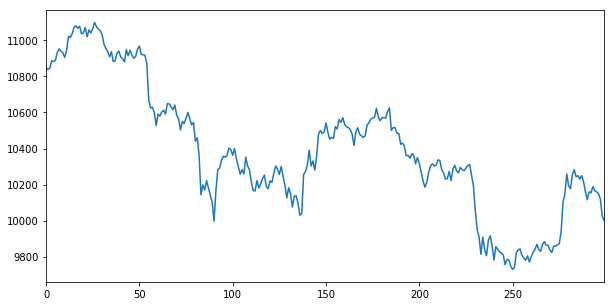

In [52]:
df4.bidPrice[0:300].plot(figsize=(10,5))

In [53]:
# График напоминает случайное блуждание. Невооруженным взглядом видно, что ряд не стационарен, но все же проведем проверку
test = sm.tsa.adfuller(df4.bidPrice)
p_value = test[1]
print ('p-value: ', p_value)
if p_value> 0.05: 
    print (' ряд не стационарен')
else:
    print ('ряд стационарен')

p-value:  0.752188809153
 ряд не стационарен
